In [1]:
import platform

files = !ls ../../results/volume*

In [2]:
import re

filepaths = {}
for file in files:
    match = re.search(r'from (\w+)', file)
    if match:
        filepaths[int(match.group(1).zfill(4))] = file

In [4]:
for key in filepaths.values():
    print key

../../results/volume-adjusted polyphasic cell cycle from 0 to 300, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_0842_200000_ribosomes_2100s.p
../../results/volume-adjusted polyphasic cell cycle from 2400 to 2700, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1317_286153_ribosomes_2100s.p
../../results/volume-adjusted polyphasic cell cycle from 3300 to 3600, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1501_318461_ribosomes_2100s.p
../../results/volume-adjusted polyphasic cell cycle from 1800 to 2100, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1202_264615_ribosomes_2100s.p
../../results/volume-adjusted polyphasic cell cycle from 300 to 600, Teufel transcriptome, full exome, no decay, wit

In [5]:
for time in filepaths:
    print time,
    #replace(filepaths[time], "_numpypy.multiarray", "numpy.core.multiarray")

0 2400 3300 1800 300 2700 1200 600 2100 3000 900 1500


Clb3 and Clb5:

In [6]:
genes = ['YDL155W', 'YPR120C']

In [7]:
import cPickle as pkl

results = {}
proteome = {}
for time in filepaths:
    print time, filepaths[time]
    results[time] = pkl.load(open(filepaths[time]))
    proteome[time] = {key: results[time]['proteome'][key] for key in genes}

0 ../../results/volume-adjusted polyphasic cell cycle from 0 to 300, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_0842_200000_ribosomes_2100s.p
2400 ../../results/volume-adjusted polyphasic cell cycle from 2400 to 2700, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1317_286153_ribosomes_2100s.p
3300 ../../results/volume-adjusted polyphasic cell cycle from 3300 to 3600, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1501_318461_ribosomes_2100s.p
1800 ../../results/volume-adjusted polyphasic cell cycle from 1800 to 2100, Teufel transcriptome, full exome, no decay, with ribo growth factor, updated initiation rates according to Shah_20170404_1202_264615_ribosomes_2100s.p
300 ../../results/volume-adjusted polyphasic cell cycle from 300 to 600, Teufel transcriptome, full

In [8]:
proteome

{0: {'YDL155W': 118, 'YPR120C': 147},
 300: {'YDL155W': 0, 'YPR120C': 306},
 600: {'YDL155W': 98, 'YPR120C': 415},
 900: {'YDL155W': 112, 'YPR120C': 230},
 1200: {'YDL155W': 180, 'YPR120C': 134},
 1500: {'YDL155W': 133, 'YPR120C': 92},
 1800: {'YDL155W': 134, 'YPR120C': 97},
 2100: {'YDL155W': 163, 'YPR120C': 92},
 2400: {'YDL155W': 84, 'YPR120C': 117},
 2700: {'YDL155W': 87, 'YPR120C': 109},
 3000: {'YDL155W': 0, 'YPR120C': 0},
 3300: {'YDL155W': 60, 'YPR120C': 102}}

In [17]:
transcriptome = pkl.load(open("../../parameters/transcriptome_time_dependent.p"))

In [19]:
transcriptome.keys()

[0, 35, 5, 40, 10, 45, 15, 50, 20, 55, 25, 60, 30]

In [22]:
transcriptome_time_resolved = {}
for time in filepaths:
    print time, 
    transcriptome_time_resolved[time] = {key: transcriptome[time/60][key] for key in genes}

 0 2400 3300 1800 300 2700 1200 600 2100 3000 900 1500


In [23]:
transcriptome_time_resolved

{0: {'YDL155W': 1, 'YPR120C': 1},
 300: {'YDL155W': 0, 'YPR120C': 2},
 600: {'YDL155W': 2, 'YPR120C': 6},
 900: {'YDL155W': 2, 'YPR120C': 3},
 1200: {'YDL155W': 3, 'YPR120C': 2},
 1500: {'YDL155W': 4, 'YPR120C': 2},
 1800: {'YDL155W': 4, 'YPR120C': 2},
 2100: {'YDL155W': 4, 'YPR120C': 2},
 2400: {'YDL155W': 1, 'YPR120C': 1},
 2700: {'YDL155W': 1, 'YPR120C': 1},
 3000: {'YDL155W': 0, 'YPR120C': 0},
 3300: {'YDL155W': 1, 'YPR120C': 1}}

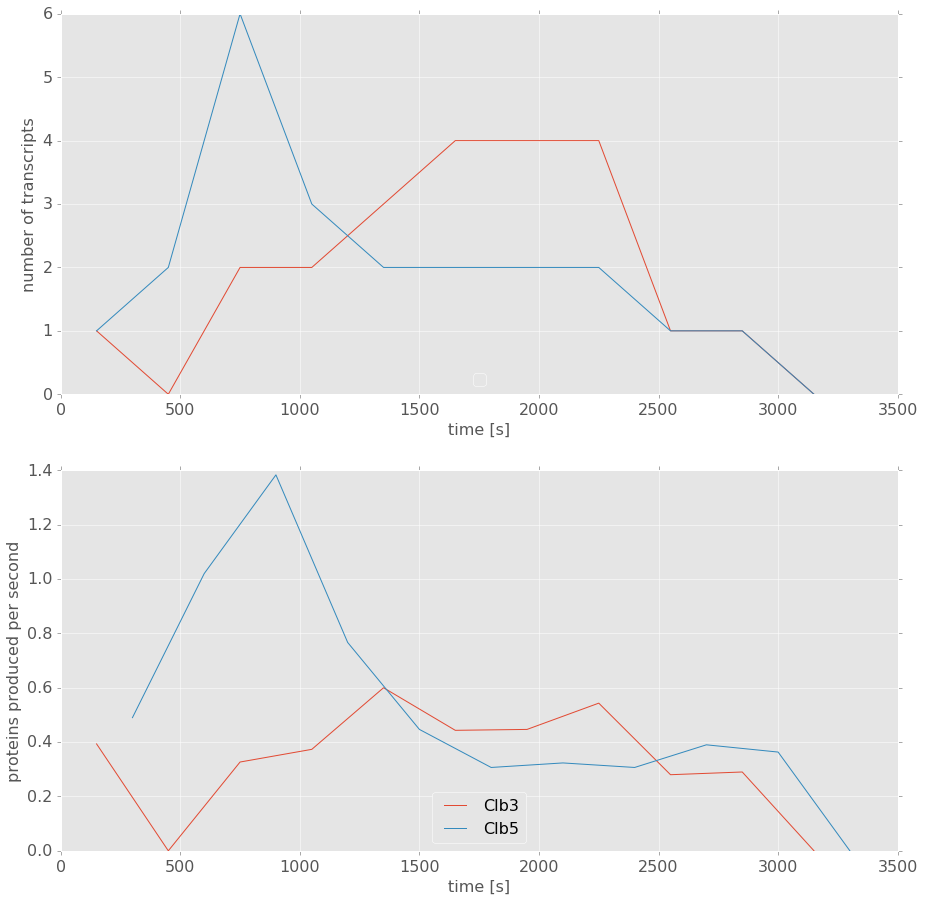

In [41]:
# Working with multiple figure windows and subplots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
matplotlib.style.use('ggplot')

import numpy as np

t1 = np.arange(150, 3450, 300)  # the transcripts "exist" all the time, hence midpoint of interval

clb3_t = [transcriptome_time_resolved[time-150]['YDL155W'] for time in t1]
clb5_t = [transcriptome_time_resolved[time-150]['YPR120C'] for time in t1]

t2 = np.arange(300, 3600, 300)  # the proteins "exist" at the end of the intervals
clb3_p = [proteome[time-300]['YDL155W']/300. for time in t2]
clb5_p = [proteome[time-300]['YPR120C']/300. for time in t2]


plt.figure(1)
ax1 = plt.subplot(211)
ax1.set_xlabel('time [s]', fontsize=16)
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
plt.legend(labels=["Clb3", "Clb5"], loc='lower center', fancybox=True, framealpha=1.0, fontsize=16)
ax1.set_ylabel("number of transcripts", fontsize=16)

plt.plot(t1, clb3_t)
plt.plot(t1, clb5_t)

ax2 = plt.subplot(212)
ax2.set_xlabel('time [s]', fontsize=16)
plt.setp(ax2.get_xticklabels(), fontsize=16)
plt.setp(ax2.get_yticklabels(), fontsize=16)

plt.plot(t1, clb3_p)
plt.plot(t2, clb5_p)
plt.legend(labels=["Clb3", "Clb5"], loc='lower center', fancybox=True, framealpha=1.0, fontsize=16)
ax2.set_ylabel("proteins produced per second", fontsize=16)